In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as patches

%matplotlib inline

%config InlineBackend.figure_format = 'retina' 

## An Example:

Create a clean visualization of vehicle volume sales across the months in $2018$ and $2019$.

In [8]:
## Import and preview data set.
df_cars = pd.read_csv("cars_data.csv")
df_cars

,month,2018,2019
0,January,38,101
1,February,47,78
2,March,49,91
3,April,42,77
4,May,42,78
5,June,38,71
6,July,43,78
7,August,52,62
8,September,49,68
9,October,67,50


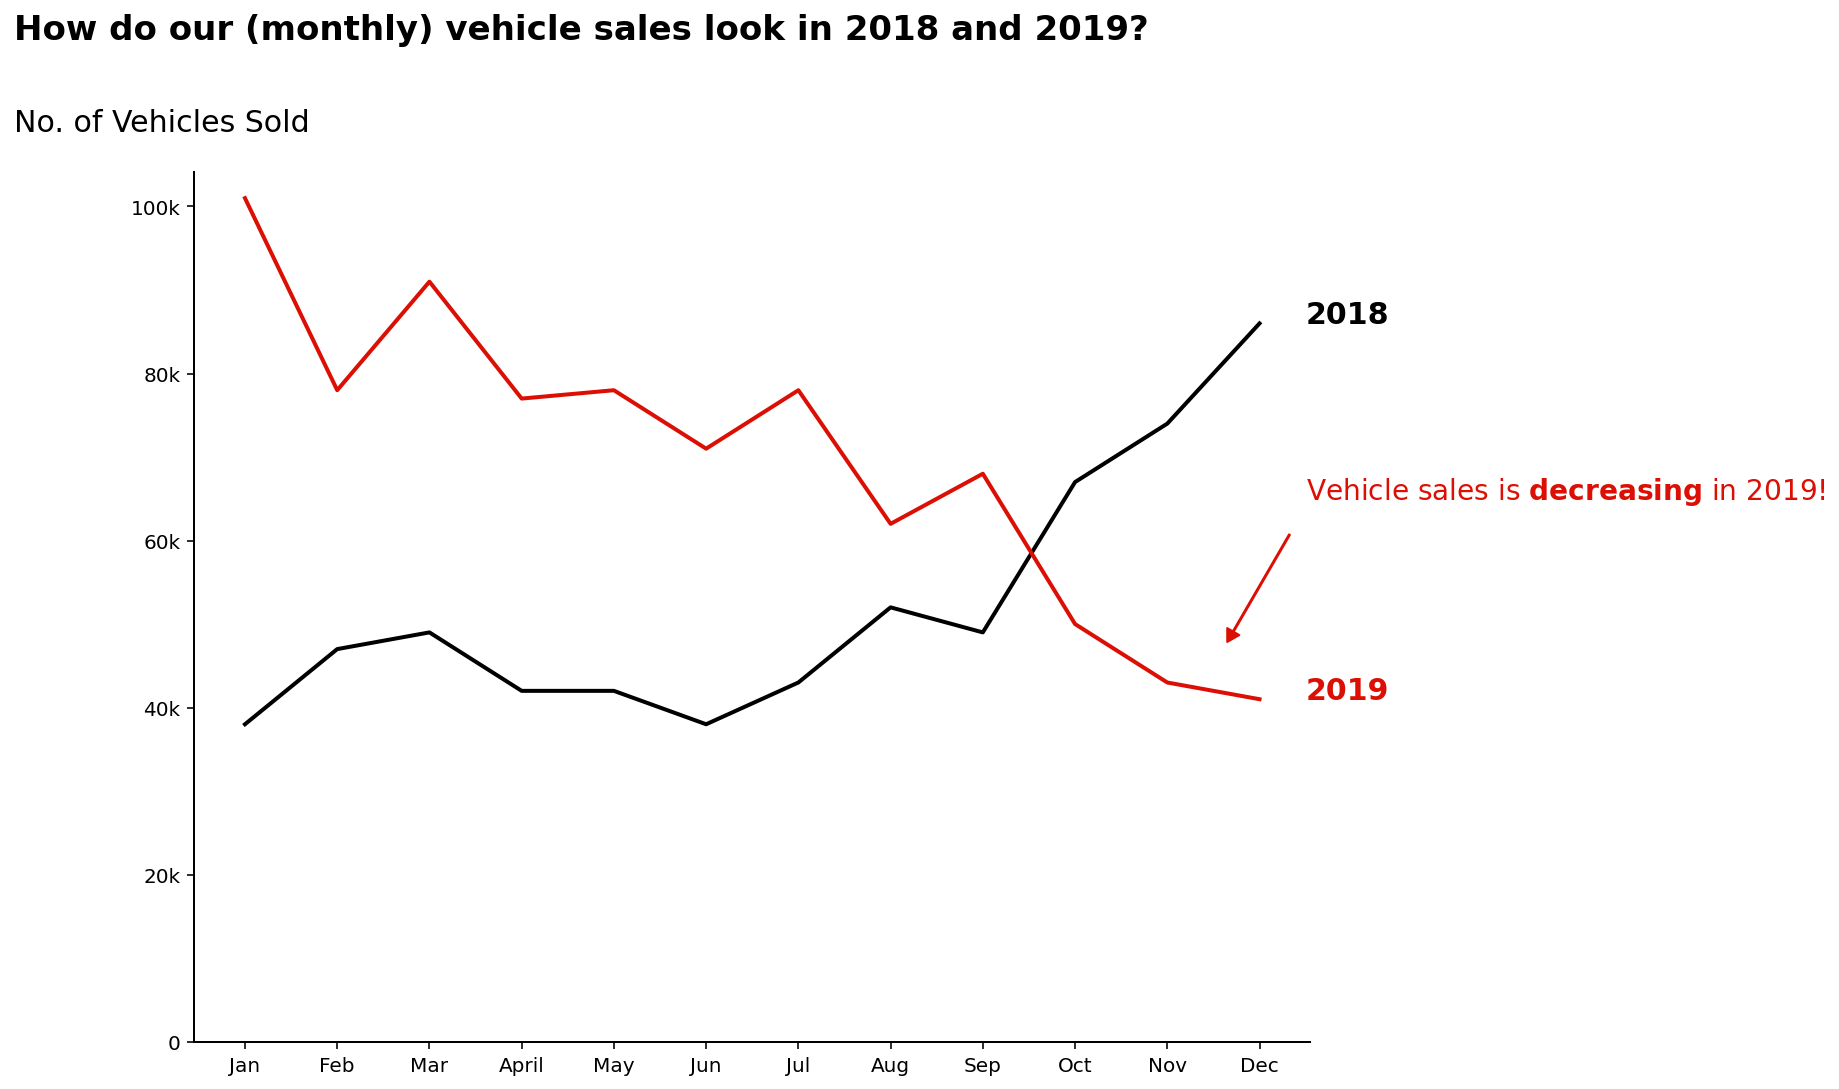

In [45]:
## Create figure and axes.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

## Plot data.
ax.plot(df_cars['month'], df_cars['2018'], marker = None, linewidth = 2, color = '#000000')
ax.plot(df_cars['month'], df_cars['2019'], marker = None, linewidth = 2, color = '#db0f04')


## Label lines.
ax.annotate('2019', (11.5, np.min(df_cars['2019'])), size = 15, weight = 'bold', annotation_clip = False,
            color = '#db0f04')
ax.annotate('2018', (11.5, np.max(df_cars['2018'])), size = 15, weight = 'bold', annotation_clip = False,
            color = '#000000')
ax.annotate('Vehicle sales is $\mathbf{decreasing}$ in 2019!', xy = (10.5, 45), xytext = (11.5, 65),
            color = '#db0f04', size = 14, annotation_clip = False,
            arrowprops = dict(color = '#db0f04', shrink = 0.15, width = 0.5, headwidth = 7, headlength = 6))


## Design x axis.
ax.set_xticks(np.arange(12))
ax.set_xticklabels(['Jan','Feb','Mar','April','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## Plot y axis.
ax.set_yticks(np.arange(0, 120, 20))
ax.set_yticklabels(['0', '20k', '40k', '60k', '80k', '100k'])
ax.annotate('No. of Vehicles Sold', (-2.5, 109), size = 15, annotation_clip = False)


## Only show the x and y axes. Hide top and right bounding lines.
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)

## Plot title.
ax.annotate('How do our (monthly) vehicle sales look in 2018 and 2019?', (-2.5, 120), size = 17,
            annotation_clip = False, weight = 'bold')

## Display plots.
plt.show()

## Another Example:

Use the `REVENUES($M)` and `PROFITS($M)` data for the top $10$ companies [here](https://fortune.com/global500/2020/search/) to create a visualization.

In [3]:
## Create and preview dataset.
data = {'Company': ['Walmart', 'Sinopec Group', 'State Grid', "China National Petroleum", 'Royal Dutch Shell', "Saudi Aramco", "Volkswagen", 'BP', 'Amazon', 'Toyota Motor'],
      'Revenue': [523964, 407009, 383906, 379130, 352106, 329784, 282760, 282616, 280522, 275288 ],
    'Profit' : [14881, 6793.2, 7970, 4443.2, 15842, 88210.9, 15542, 4026, 11588, 19096.2]}
df_q3 = pd.DataFrame(data)
df_q3

,Company,Revenue,Profit
0,Walmart,523964,14881.0
1,Sinopec Group,407009,6793.2
2,State Grid,383906,7970.0
3,China National Petroleum,379130,4443.2
4,Royal Dutch Shell,352106,15842.0
5,Saudi Aramco,329784,88210.9
6,Volkswagen,282760,15542.0
7,BP,282616,4026.0
8,Amazon,280522,11588.0
9,Toyota Motor,275288,19096.2


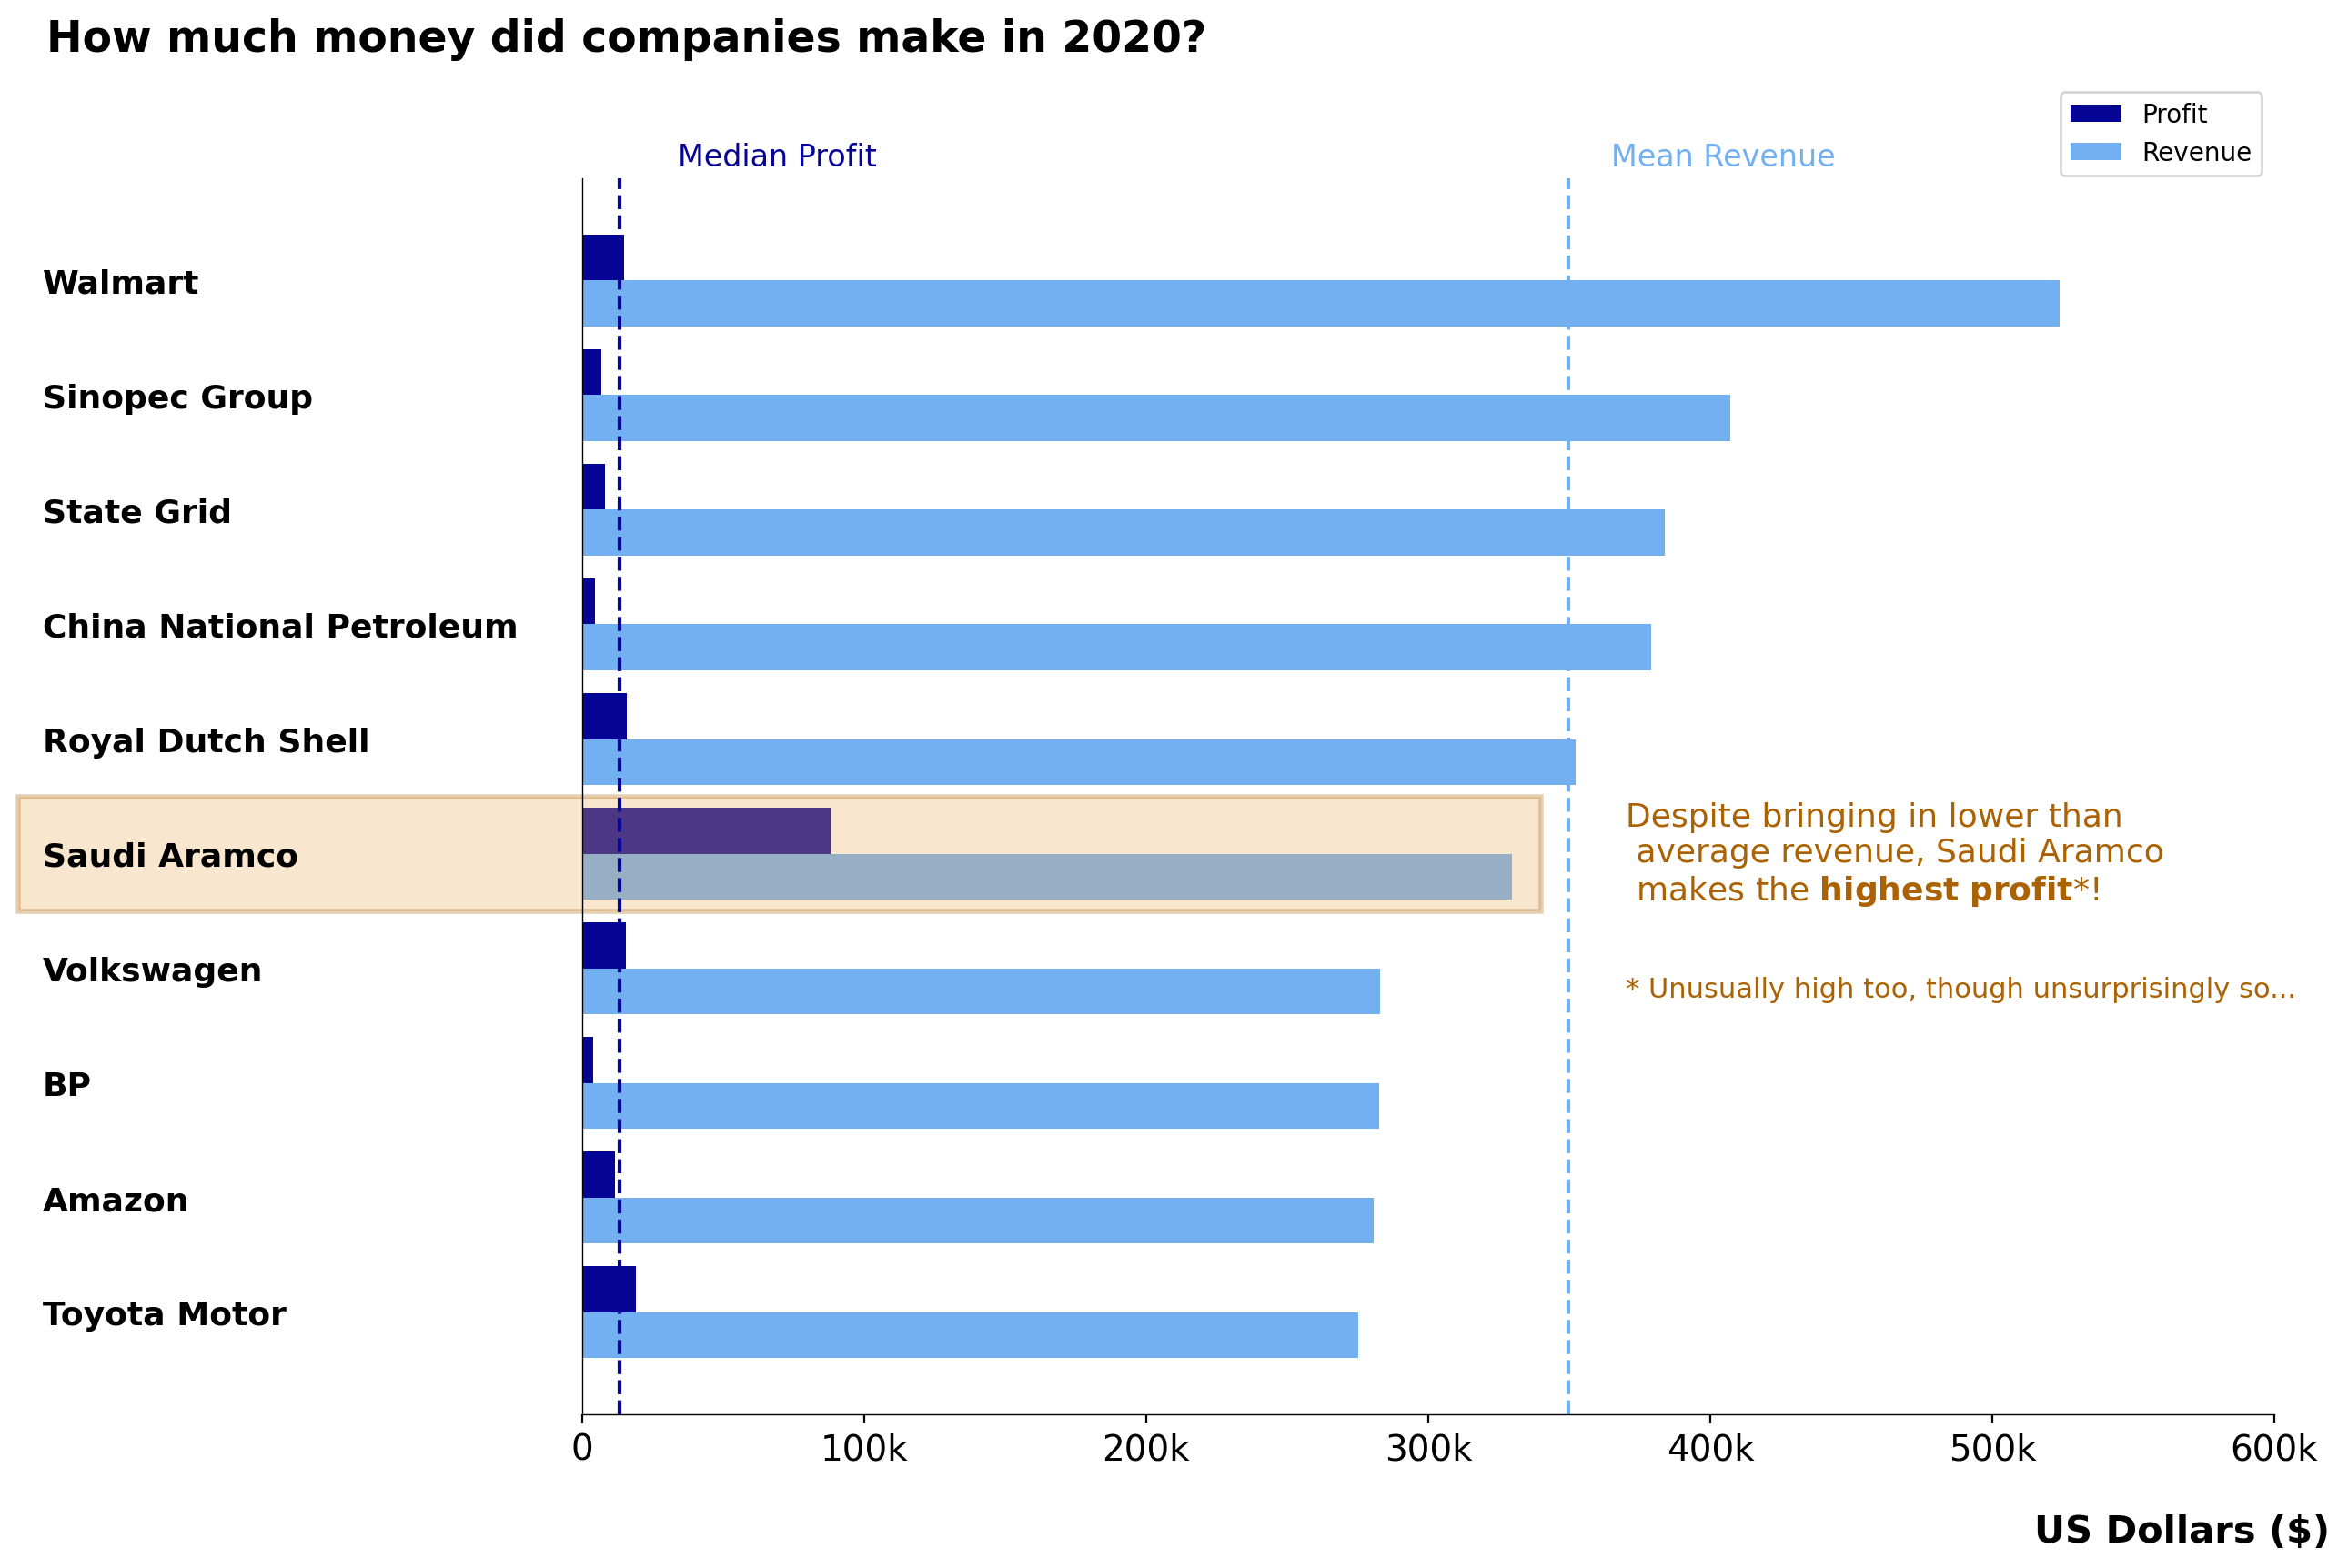

In [4]:
## Create a horizontal bar plot.

## Get the data into formats appropriate for plotting.
list_revenue = df_q3['Revenue'].tolist()
list_profit = df_q3['Profit'].tolist()
list_q3 = df_q3['Company'].tolist()
list_q3.reverse()
dict_yx = dict(zip(list_profit, list_revenue))
list_yx_sorted = sorted(dict_yx.items(), key = lambda x: x[1], reverse = False) # List of tuples.
list_profit_final = []
list_revenue_final = []
for tuple_i in list_yx_sorted:
    list_profit_final.append(tuple_i[0])
    list_revenue_final.append(tuple_i[1])

## Set bar height.
h = 0.8

## Set up figure and axes.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 9), dpi = 100)

## Plot bars.
ax.barh(np.arange(0, 20, 2)+h/2, list_profit_final, color = '#070596', height = h, label = 'Profit')
ax.barh(np.arange(0, 20, 2)-h/2, list_revenue_final, color = '#72b0f2', height = h, label = 'Revenue') #a2c6f5

## Hide unnnecessary axes spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

## Add vertical dashed lines at to indicate median profit and mean revenue.
ax.axvline(x = np.mean(list_revenue_final), color = '#72b0f2', ls = '--')
ax.axvline(x = np.median(list_profit_final), color = '#070596', ls = '--')
ax.annotate('Mean Revenue', (np.mean(list_revenue_final) + 15000, 20), size = 12, annotation_clip = False,
            color = '#72b0f2')
ax.annotate('Median Profit', (np.mean(list_profit_final) + 15000, 20), size = 12, annotation_clip = False,
            color = '#070596')

## Set up y axis.
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.tick_params(axis = 'y', direction = 'out', pad = 210, left = False)
ax.set_yticklabels(list_q3, ha = 'left', weight = 'bold', size = 13)

## Set up x axis.
ax.set_xticks([0, 100000, 200000, 300000, 400000, 500000, 600000])
ax.set_xticklabels(['0', '100k', '200k', '300k', '400k', '500k', '600k'], size = 14)
ax.annotate('US Dollars ($)', (515000, -4), size = 15, weight = 'bold', annotation_clip = False)

## Set up title.
ax.annotate('How much money did companies make in 2020?', (-190000, 22), size = 17, annotation_clip = False,
            weight = 'bold')

## Plot legend.
ax.legend(bbox_to_anchor = (1, 1.08))

## Highlight 'Saudi Aramco' box.
ax.add_patch(patches.Rectangle(xy = (-200000, 7), width = 540000, height = 2, linewidth = 2, edgecolor = '#ab6203',
                               facecolor = '#ebae5e', alpha = 0.3, clip_on = False))

## Annotate.
ax.annotate('Despite bringing in lower than\n average revenue, Saudi Aramco\n makes the $\mathbf{highest}$ $\mathbf{profit}$*!',
            (370000, 7.2), size = 13, annotation_clip = False, color = '#ab6203')
ax.annotate('* Unusually high too, though unsurprisingly so...',
            (370000, 5.5), size = 11, annotation_clip = False, color = '#ab6203')

## Display everything.
plt.show()

<div class="alert alert-block alert-success">
    
<b><center> End of Code Sample <b>